In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path
import pandas as pd
from collections import defaultdict
import itertools

import sys
sys.path.append("ComputeCanada/frequency_tagging")
from utils import (
    get_roi_colour_codes,
    change_font,
    PICKLE_DIR,
    get_frequency_text_codes,
    MAIN,
)
change_font()

tmpdir = Path("/tmp")

# Extended figure 2.
Plot vertex count across different thresholding

In [2]:
ROI_FO = 0.8 # Don't change
fos = [.8, 1] # Don't change

experiment_ids = ["3TNormal"] * 9 * 2 * 4 + ["7TNormal"] * 4 * 1 * 4 + ["3TVary"] * 6 * 1 * 4 + ["7TVary"] * 6 * 1 * 4
sub_ids = (["000","002","003","004","005","006","007","008","009"] * 2) * 4 \
    + ["Pilot001","Pilot009","Pilot010","Pilot011"] * 4 \
    + ((["020"] * 3 + ["021"] * 3) * 4) * 2
roi_task_ids = (["control"] * 9 + ["entrain"] * 9) * 4 \
    + (["AttendAway"] * 4) * 4 \
    + (([f"entrain{i}" for i in ["A","B","C","D","E","F"]]) * 4) * 2
im_codes = ["f1"]*18 + ["f2"]*18 + ["f2-f1"]*18 + ["2f1"]*18 \
    + ["f1"] * 4 + ["f2"] * 4 + ["f2-f1"] * 4 + ["2f1"] * 4 \
    + (["f1"] * 6 + ["f2"] * 6 + ["f2-f1"] * 6 + ["2f1"] * 6) * 2

assert len(experiment_ids) == len(sub_ids) == len(roi_task_ids) == len(im_codes), f"{len(experiment_id)} {len(sub_ids)} {len(roi_task_ids)} {len(im_codes)}" 

vertex_dict = defaultdict(list)

for corr_type in ["fdrp","uncp"]:

    df = pd.read_pickle(PICKLE_DIR / f"im_map_fo-{ROI_FO}_corr-{corr_type}.pkl")

    for fo, (experiment_id, sub_id, roi_task_id, im_code) in itertools.product(fos,zip(experiment_ids, sub_ids, roi_task_ids, im_codes)):
        sub_df = df[(df.sub_id==sub_id) & (df.experiment_id==experiment_id) & (df.roi_task_id==roi_task_id) & (df.im_code==im_code)].reset_index()
        # assertions
        for col in ["roi_task_id","roi_fo","sub_id"]:
            assert len(sub_df[col].unique()) == 1, f"{col} > unique element"
        # count
        vertex_count = 0
        for i, row in sub_df.iterrows():
            _vertex_count = (row.train_f_im_activation>=fo).sum()
            vertex_count += _vertex_count

        vertex_dict["corr_type"].append(corr_type)
        vertex_dict["fo"].append(fo)
        vertex_dict["experiment_id"].append(experiment_id)
        vertex_dict["sub_id"].append(sub_id)
        vertex_dict["roi_task_id"].append(roi_task_id)
        vertex_dict["im_code"].append(im_code)
        vertex_dict["vertex_count"].append(vertex_count)

vertex_df = pd.DataFrame(vertex_dict)

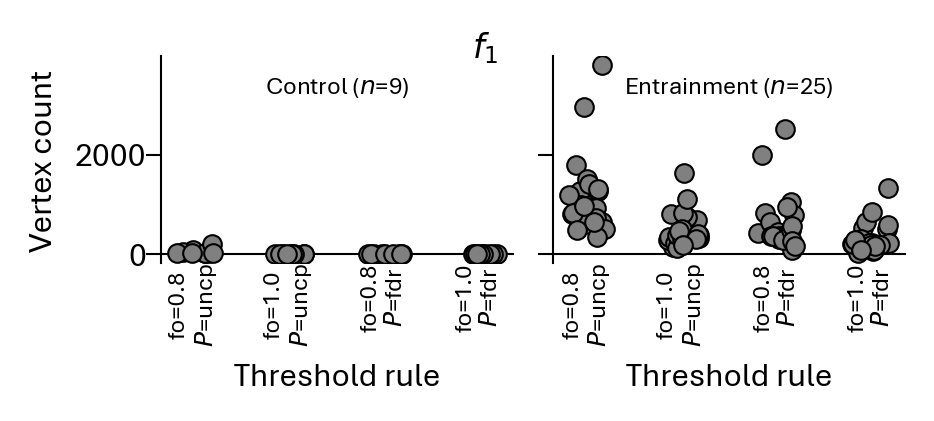

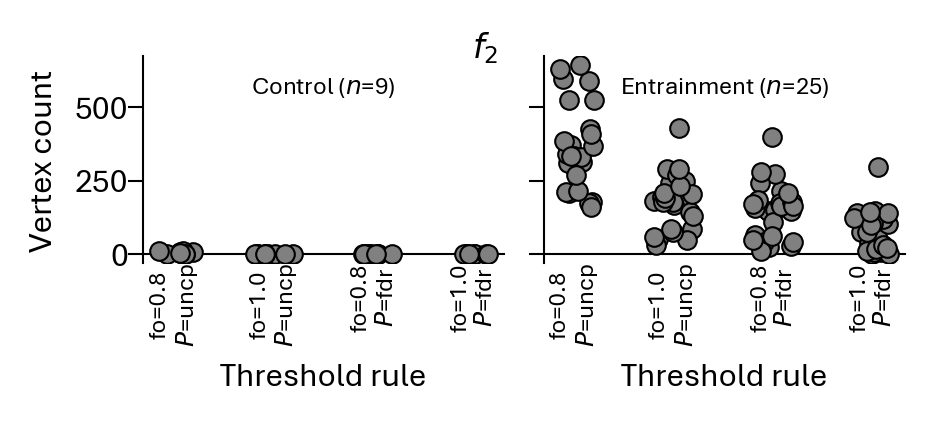

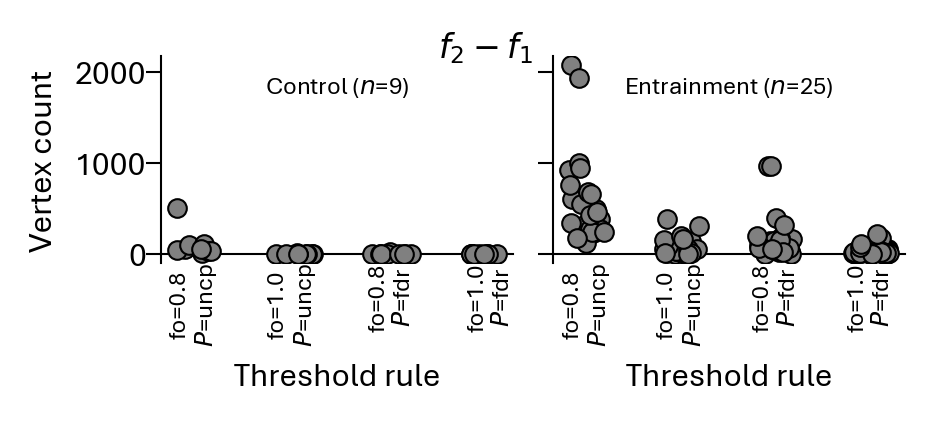

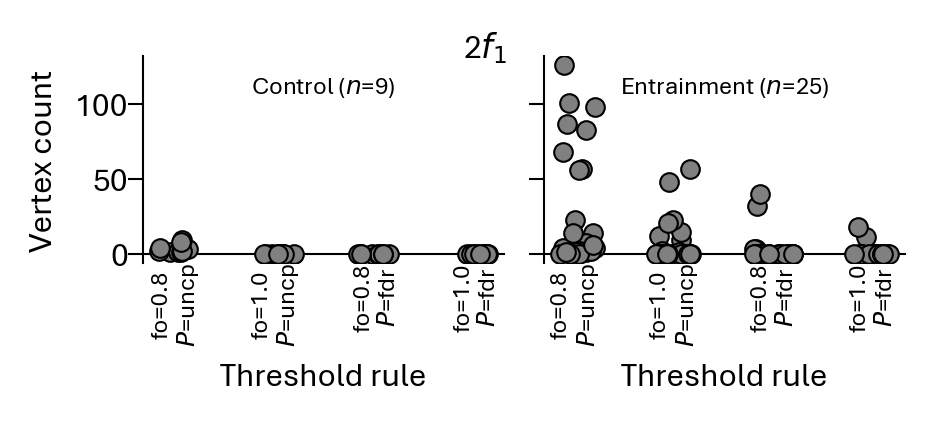

In [4]:
FONTSIZE = 8
linewidth = .5
def plot_vertex_count_across_im_codes(im_code, vertex_df):
    xlabels = [
        "fo=0.8\n$P$=uncp",
        "fo=1.0\n$P$=uncp",
        "fo=0.8\n$P$=fdr",
        "fo=1.0\n$P$=fdr",
    ]
    mosaic = ["control", "notcontrol"]
    fig, ax_dict = plt.subplot_mosaic([mosaic], figsize=(3, 1.2), sharey=True, dpi=300,layout="constrained")
    for mosaic_ix, mosaic_type in enumerate(mosaic):
        ax=ax_dict[mosaic_type]
        if mosaic_type == "control":
            main = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id=="control")]["vertex_count"]
            x2=vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id=="control")]["vertex_count"]
            x3=vertex_df[(vertex_df.corr_type=="fdrp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id=="control")]["vertex_count"]
            x4=vertex_df[(vertex_df.corr_type=="fdrp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id=="control")]["vertex_count"]
        else:
            main = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["vertex_count"]
            x2=vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["vertex_count"]
            x3=vertex_df[(vertex_df.corr_type=="fdrp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["vertex_count"]
            x4=vertex_df[(vertex_df.corr_type=="fdrp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["vertex_count"]
            
            sub_id = "000"
            main_s = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["sub_id"]
            main_s = main[main_s[main_s==sub_id].index]
            x2_s = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["sub_id"]
            x2_s = x2_s[x2_s[x2_s==sub_id].index]
            x3_s = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["sub_id"]
            x3_s = x3_s[x3_s[x3_s==sub_id].index]
            x4_s = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==1.) & (vertex_df.im_code==im_code) & (vertex_df.roi_task_id!="control")]["sub_id"]
            x4_s = x4_s[x4_s[x4_s==sub_id].index]

        for ix, (_,data) in enumerate(zip(xlabels,[main,x2,x3,x4])):
            random_uni = np.random.uniform(-.2,.2,size=len(data))
            ax.scatter(
                np.zeros(len(data))+ix+random_uni,
                data, 
                s=20, linewidths=linewidth, alpha=1., color="grey",edgecolor='k',zorder=20
            )

        
        for spine_type in ("top","right"):
            ax.spines[spine_type].set_visible(False)

        ax.spines.left.set_linewidth(linewidth)
        ax.spines.left.set_position(("outward",0))
        ax.spines.bottom.set_linewidth(linewidth)
        ax.spines.bottom.set_position('zero')
        ax.set_xticks([0,1,2,3])
        ax.set_xticklabels(xlabels, rotation=90, fontsize=FONTSIZE-2)
        ax.set_xlabel("Threshold rule", fontsize=FONTSIZE)
        if mosaic_ix==0:
            ax.set_ylabel("Vertex count", fontsize=FONTSIZE)

        if mosaic_type == "control":
            _title = "Control ($n$=9)"
        else:
            _title = "Entrainment ($n$=25)"
        ax.set_title(_title, fontsize=FONTSIZE-2, y=.7)
        ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=0)
        ax.tick_params(axis='x', which='both', labelsize=FONTSIZE-2, width=linewidth, pad=2, length=0)
            
        #fig.savefig(MAIN / f"ExtFig1_changeRMSE_across_experiments.png", dpi=300)
    _title = get_frequency_text_codes()[im_code]
    fig.suptitle(f"{_title}", fontsize=FONTSIZE,x=.52,y=1.04)
    fig.savefig(MAIN / f"ExtFig2_vertex_count_comparison_between_threshold_method_{im_code}.png", dpi=300,bbox_inches="tight")

for im_code in vertex_df.im_code.unique():
    plot_vertex_count_across_im_codes(im_code, vertex_df)

Vertex count of sub-002

In [5]:
for corr_type,fo in itertools.product( ["fdrp","uncp"],[.8, 1.]):
    print(corr_type,fo,vertex_df[(vertex_df.corr_type==corr_type) & (vertex_df.fo==fo) & (vertex_df.im_code=="f2-f1") & (vertex_df.roi_task_id=="entrain") & (vertex_df.sub_id=="002")]["vertex_count"].values)

fdrp 0.8 [38]
fdrp 1.0 [2]
uncp 0.8 [232]
uncp 1.0 [25]


# Sensitivity of entrainment experiments (dual frequencies)

In [6]:
sub_df[(sub_df.hcp_roi=="CONTRA_V1")]

,index,roi_task_id,roi_fo,experiment_id,sub_id,quadrant_id,hcp_roi,im_code,frequency_of_roi,frequency_coordinates,slab_coordinates,train_f_im_activation,train_f_im_phase_delay,test_f_im_BOLD_power,test_f_im_BOLD_psnr,test_f_im_phase_delay,tasklock
93,53560,entrainF,0.8,7TVary,021,Q1,CONTRA_V1,2f1,0.35,"[False, False, False, False, False, False, Fal...","[False, False, False, False, False, False, Fal...","[0.12, 0.1075, 0.035, 0.0075, 0.0, 0.0, 0.0, 0...","[1.9695594771578908, 1.9725091260671617, 1.926...","[1.1447348158624137e-05, 1.063971832042189e-05...","[1.4577587508186116, 0.8149861136478478, 0.419...","[1.9551843931525945, 1.965790721012745, 1.9512...","[0.02861158798649934, 0.03468800932764491, 0.0..."


In [7]:
ROI_FO = 0.8 # Don't change

experiment_ids = ["3TNormal"] * 9 * 2 * 1 + ["7TNormal"] * 4 * 1 * 1 + ["3TVary"] * 6 * 1 * 1 + ["7TVary"] * 6 * 1 * 1
sub_ids = (["000","002","003","004","005","006","007","008","009"] * 2) * 1 \
    + ["Pilot001","Pilot009","Pilot010","Pilot011"] * 1 \
    + ((["020"] * 3 + ["021"] * 3) * 1) * 2
roi_task_ids = (["control"] * 9 + ["entrain"] * 9) * 1 \
    + (["AttendAway"] * 1) * 4 \
    + (([f"entrain{i}" for i in ["A","B","C","D","E","F"]]) * 1) * 2

assert len(experiment_ids) == len(sub_ids) == len(roi_task_ids), f"{len(experiment_ids)} {len(sub_ids)} {len(roi_task_ids)}" 

vertex_dict = defaultdict(list)

corr_type = "uncp"
df = pd.read_pickle(PICKLE_DIR / f"df_map_corr-{corr_type}.pkl")

for experiment_id, sub_id, roi_task_id in zip(experiment_ids, sub_ids, roi_task_ids):
    sub_df = df[(df.sub_id==sub_id) & (df.experiment_id==experiment_id) & (df.roi_task_id==roi_task_id) & (df.frequency_of_roi=="f1")].reset_index()
    # assertions
    for col in ["roi_task_id","roi_fo","sub_id"]:
        assert len(sub_df[col].unique()) == 1, f"{col} > unique element"
    # count
    f1_vertex_count, f2_vertex_count, f1f2_vertex_count = 0, 0, 0
    for i, row in sub_df.iterrows():
        _f1_vertex_count = (row.train_f1_activation>=ROI_FO).sum()
        _f2_vertex_count = (row.train_f2_activation>=ROI_FO).sum()
        _f1f2_vertex_count = (((row.train_f1_activation>=ROI_FO).astype(int) + (row.train_f2_activation>=ROI_FO).astype(int)) == 2).sum()
        f1_vertex_count += _f1_vertex_count
        f2_vertex_count += _f2_vertex_count
        f1f2_vertex_count += _f1f2_vertex_count

    print(experiment_id, sub_id, roi_task_id, f1_vertex_count, f2_vertex_count, f1f2_vertex_count)

    vertex_dict["corr_type"].append(corr_type)
    vertex_dict["experiment_id"].append(experiment_id)
    vertex_dict["sub_id"].append(sub_id)
    vertex_dict["roi_task_id"].append(roi_task_id)
    vertex_dict["f1_vertex_count"].append(f1_vertex_count)
    vertex_dict["f2_vertex_count"].append(f2_vertex_count)
    vertex_dict["f1f2_vertex_count"].append(f1f2_vertex_count)

vertex_df = pd.DataFrame(vertex_dict)

3TNormal 000 control 24 3 0
3TNormal 002 control 52 2 0
3TNormal 003 control 17 1 0
3TNormal 004 control 7 2 0
3TNormal 005 control 181 9 0
3TNormal 006 control 21 0 0
3TNormal 007 control 4 1 0
3TNormal 008 control 18 4 0
3TNormal 009 control 9 2 0
3TNormal 000 entrain 924 296 192
3TNormal 002 entrain 1690 485 365
3TNormal 003 entrain 1239 306 184
3TNormal 004 entrain 1210 356 303
3TNormal 005 entrain 3716 488 383
3TNormal 006 entrain 1460 561 328
3TNormal 007 entrain 860 294 174
3TNormal 008 entrain 749 169 121
3TNormal 009 entrain 1302 404 290
7TNormal Pilot001 AttendAway 632 175 89
7TNormal Pilot009 AttendAway 845 291 174
7TNormal Pilot010 AttendAway 566 546 181
7TNormal Pilot011 AttendAway 2854 325 279
3TVary 020 entrainA 878 325 221
3TVary 020 entrainB 586 351 180
3TVary 020 entrainC 746 617 283
3TVary 021 entrainD 680 188 98
3TVary 021 entrainE 461 192 29
3TVary 021 entrainF 324 146 28
7TVary 020 entrainA 1086 355 210
7TVary 020 entrainB 753 370 212
7TVary 020 entrainC 950 597 2

# Extended figure 4b
Sensitivity between control and entrain condition

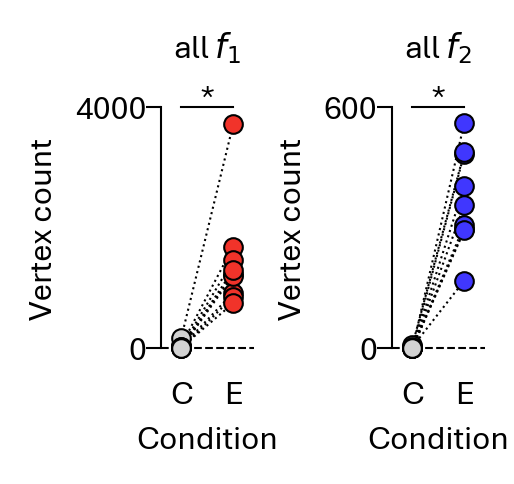

In [8]:
from scipy.stats import wilcoxon

FONTSIZE = 8
linewidth = .5

sub_ids = ["000","002","003","004","005","006","007","008","009"]

control_f1_count = []
control_f2_count = []
entrain_f1_count = []
entrain_f2_count = []

for sub_id in sub_ids:
    control_row = vertex_df[(vertex_df.sub_id==sub_id) & (vertex_df.roi_task_id=="control")]
    entrain_row = vertex_df[(vertex_df.sub_id==sub_id) & (vertex_df.roi_task_id=="entrain")]
    assert entrain_row.shape[0] == control_row.shape[0] == 1

    _control_f1_count = control_row.f1_vertex_count.values[0]
    _entrain_f1_count = entrain_row.f1_vertex_count.values[0]
    _control_f2_count = control_row.f2_vertex_count.values[0]
    _entrain_f2_count = entrain_row.f2_vertex_count.values[0]

    control_f1_count.append(_control_f1_count)
    control_f2_count.append(_control_f2_count)
    entrain_f1_count.append(_entrain_f1_count)
    entrain_f2_count.append(_entrain_f2_count)

f_colors = get_roi_colour_codes()


mosaic = ["f1","f2"]
fig, ax_dict = plt.subplot_mosaic([mosaic], figsize=(1.6, 1.5), dpi=300,layout="constrained")
f_data = [
    (control_f1_count, entrain_f1_count),
    (control_f2_count, entrain_f2_count),

]
bounds = {
    "f1": (0, 4000),
    "f2": (0, 600),
}
yticks = {
    "f1": (0,6000,4000),
    "f2": (0, 900,600),
}
asterick_ypos = {
    "f1": 4000,
    "f2": 600,
}
for ix, (f_type, _f_data) in enumerate(zip(mosaic, f_data)):
    ax = ax_dict[f_type]
    title = get_frequency_text_codes()[f_type]
    title = f"all {title}"
    control_count, entrain_count = _f_data
    # Plot scatter
    for xpos, count_data in enumerate([control_count, entrain_count]):
        c=f_colors[f_type]
        if xpos == 0:
            c = "lightgrey"
        ax.scatter(np.zeros(len(count_data))+xpos, count_data, s=20, linewidths=linewidth, alpha=1., color=c,edgecolor='k',zorder=20)
    # Plot bar
    assert len(control_count)==len(entrain_count)
    for i in range(len(control_count)):
        _control = control_count[i]
        _entrain = entrain_count[i]
        ax.plot([0,1],[_control,_entrain], linestyle="dotted", color="k", linewidth=linewidth, zorder=10)


    ax.set_title(title, fontsize=FONTSIZE, y=1.05)

    for spine_type in ("top","right","bottom"):
        ax.spines[spine_type].set_visible(False)
    ax.spines.left.set_linewidth(linewidth)

    ax.spines.left.set_bounds(bounds[f_type][0], bounds[f_type][1])

    ax.set_yticks(yticks[f_type])
    ax.set_yticklabels(yticks[f_type], fontsize=FONTSIZE)

    ax.set_xticks([0,1])
    ax.set_xticklabels(["C","E"],rotation=0, fontsize=FONTSIZE)
    ax.set_xlim((-.4,1.4))

    ax.set_ylabel("Vertex count", fontsize=FONTSIZE)
    ax.set_xlabel("Condition", fontsize=FONTSIZE)

    wilcoxon_result = wilcoxon(control_count, entrain_count)
    txt = "n.s."
    if wilcoxon_result.pvalue*3 < .05:
        txt = "*"
    ax.text(.5, asterick_ypos[f_type], txt, fontsize=FONTSIZE, ha="center")
    ax.plot([0,1],[asterick_ypos[f_type],asterick_ypos[f_type]], linestyle="solid", color="k", linewidth=linewidth, zorder=10)
    ax.plot([-.4,1.4],[0]*2, linestyle='dashed',color='k',linewidth=linewidth,zorder=2)
    
    ax.tick_params(axis='x', which='both', labelsize=FONTSIZE, width=linewidth, pad=5, length=0)
    ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=0)
    
fig.savefig(MAIN / f"ExtFig4_vertex_count_of_fundamental_frequencies_between_control_and_entrainment.png", dpi=300,bbox_inches="tight")

# Extended figure 3
Frequency dependence on sensitivity

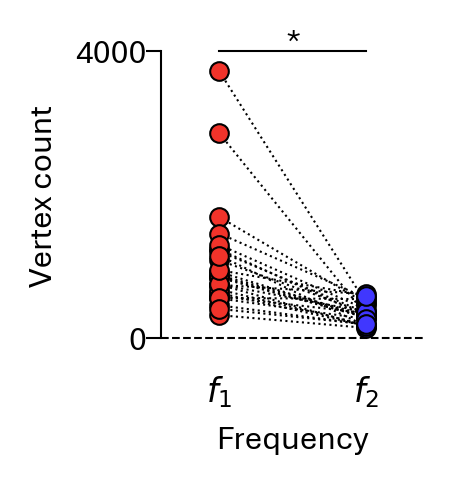

In [9]:
entrain_vertex_df = vertex_df[(vertex_df.roi_task_id!="control")]

fig, ax = plt.subplots(figsize=(1.4, 1.5), dpi=300,layout="constrained")

ax.scatter(np.zeros(len(entrain_vertex_df))+0, entrain_vertex_df.f1_vertex_count,c=get_roi_colour_codes()["f1"],s=20,linewidths=linewidth,alpha=1.,edgecolor='k',zorder=20)
ax.scatter(np.zeros(len(entrain_vertex_df))+1, entrain_vertex_df.f2_vertex_count,c=get_roi_colour_codes()["f2"],s=20,linewidths=linewidth,alpha=1.,edgecolor='k',zorder=20)

# Plot bar
for i,row in entrain_vertex_df.iterrows():
    f1_count = row.f1_vertex_count
    f2_count = row.f2_vertex_count
    ax.plot([0,1],[f1_count,f2_count], linestyle="dotted", color="k", linewidth=linewidth, zorder=10)

#title="Frequency type"
#ax.set_title(title, fontsize=FONTSIZE, y=1.05)

for spine_type in ("top","right","bottom"):
    ax.spines[spine_type].set_visible(False)
ax.spines.left.set_linewidth(linewidth)

ax.spines.left.set_bounds(0,4000)

ax.set_yticks([0,4000])
ax.set_yticklabels([0,4000], fontsize=FONTSIZE)

ax.set_xticks([0,1])
ax.set_xticklabels(["$f_1$","$f_2$"],rotation=0, fontsize=FONTSIZE)
ax.set_xlim((-.4,1.4))

ax.set_ylabel("Vertex count", fontsize=FONTSIZE)
ax.set_xlabel("Frequency", fontsize=FONTSIZE)

wilcoxon_result = wilcoxon(entrain_vertex_df.f1_vertex_count, entrain_vertex_df.f2_vertex_count)
txt = "n.s."
if wilcoxon_result.pvalue*3 < .05:
    txt = "*"
ax.text(.5, 4000, txt, fontsize=FONTSIZE, ha="center")
ax.plot([0,1],[4000,4000], linestyle="solid", color="k", linewidth=linewidth, zorder=10)
ax.plot([-.4,1.4],[0]*2, linestyle='dashed',color='k',linewidth=linewidth,zorder=2)

ax.tick_params(axis='x', which='both', labelsize=FONTSIZE, width=linewidth, pad=5, length=0)
ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=0)

fig.savefig(MAIN / f"ExtFig3_sensitivtity_of_fundamental_frequencies.png", dpi=300,bbox_inches="tight")


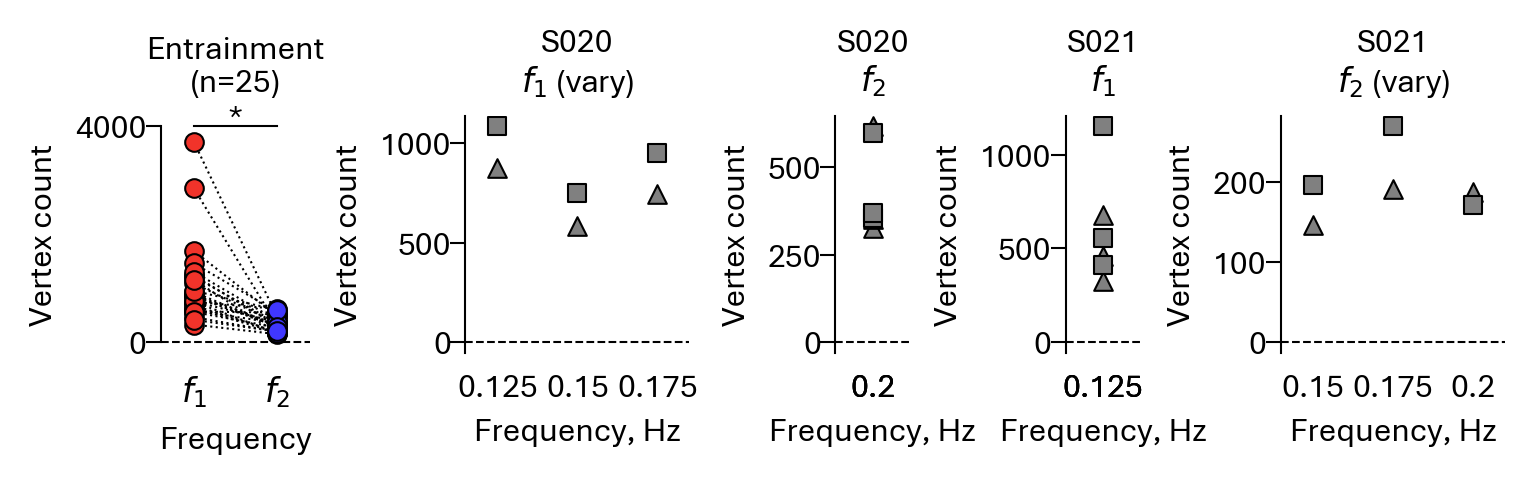

In [10]:
import warnings
warnings.filterwarnings("ignore")


vary_sub_ids = ["020"]*2 + ["021"]*2
vary_f_types = ["f1","f2","f1","f2"]
mosaic = ["ALL"] + [f"{i}_{j}" for i,j in zip(vary_sub_ids,vary_f_types)]
fig, ax_dict = plt.subplot_mosaic([mosaic],figsize=(5, 1.5), dpi=300,layout="constrained",gridspec_kw={'width_ratios': [2/3,1, 1/3,1/3,1]})

# All
entrain_vertex_df = vertex_df[(vertex_df.roi_task_id!="control")]

ax = ax_dict["ALL"]

ax.scatter(np.zeros(len(entrain_vertex_df))+0, entrain_vertex_df.f1_vertex_count,c=get_roi_colour_codes()["f1"],s=20,linewidths=linewidth,alpha=1.,edgecolor='k',zorder=20)
ax.scatter(np.zeros(len(entrain_vertex_df))+1, entrain_vertex_df.f2_vertex_count,c=get_roi_colour_codes()["f2"],s=20,linewidths=linewidth,alpha=1.,edgecolor='k',zorder=20)

# Plot bar
for i,row in entrain_vertex_df.iterrows():
    f1_count = row.f1_vertex_count
    f2_count = row.f2_vertex_count
    ax.plot([0,1],[f1_count,f2_count], linestyle="dotted", color="k", linewidth=linewidth, zorder=10)

title="Entrainment\n(n=25)"
ax.set_title(title, fontsize=FONTSIZE)

for spine_type in ("top","right","bottom"):
    ax.spines[spine_type].set_visible(False)
ax.spines.left.set_linewidth(linewidth)

ax.spines.left.set_bounds(0,4000)

ax.set_yticks([0,4000])
ax.set_yticklabels([0,4000], fontsize=FONTSIZE)

ax.set_xticks([0,1])
ax.set_xticklabels(["$f_1$","$f_2$"],rotation=0, fontsize=FONTSIZE)
ax.set_xlim((-.4,1.4))

ax.set_ylabel("Vertex count", fontsize=FONTSIZE)
ax.set_xlabel("Frequency", fontsize=FONTSIZE)

wilcoxon_result = wilcoxon(entrain_vertex_df.f1_vertex_count, entrain_vertex_df.f2_vertex_count)
txt = "n.s."
if wilcoxon_result.pvalue*3 < .05:
    txt = "*"
ax.text(.5, 4000, txt, fontsize=FONTSIZE, ha="center")
ax.plot([0,1],[4000,4000], linestyle="solid", color="k", linewidth=linewidth, zorder=10)
ax.plot([-.4,1.4],[0]*2, linestyle='dashed',color='k',linewidth=linewidth,zorder=2)

ax.tick_params(axis='x', which='both', labelsize=FONTSIZE, width=linewidth, pad=5, length=0)
ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=0)




# Varying
f_map = {
    "entrainA": (.125,.2),
    "entrainB": (.15,.2),
    "entrainC": (.175,.2),
    "entrainD": (.125,.2),
    "entrainE": (.125,.175),
    "entrainF": (.125,.15),
}


sub_ids = ["020"]*2 + ["021"]*2
f_indices = [0,1,0,1]
f_types = ["f1","f2","f1","f2"]

for sub_id, f_index, f_type in zip(sub_ids,f_indices,f_types):


    ax = ax_dict[f"{sub_id}_{f_type}"]
    for mri_id,marker in zip(("3T","7T"),('^','s')):
        vary_df = entrain_vertex_df[(entrain_vertex_df.experiment_id==f"{mri_id}Vary") & (entrain_vertex_df.sub_id==sub_id)]
        vary_df["normalized_vertex_count"] = vary_df.f1_vertex_count / vary_df.f2_vertex_count
        frequency_plot = [f_map[i][f_index] for i in vary_df.roi_task_id]
        vertex_count_vary = vary_df[f"{f_type}_vertex_count"]
        #vertex_count_vary = vary_df["normalized_vertex_count"]
        ax.scatter(frequency_plot, vertex_count_vary,s=20,linewidths=linewidth,alpha=1.,edgecolor='k',zorder=20,c="grey",marker=marker)

    ax.set_xticks(frequency_plot)
    ax.set_xticklabels(frequency_plot, fontsize=FONTSIZE)
    ax.set_xlabel("Frequency, Hz", fontsize=FONTSIZE)

    if f_type == "f1":
        title = f"S{sub_id}\n$f_1$"
        if sub_id == "020":
            title+=" (vary)"
    else:
        title = f"S{sub_id}\n$f_2$"
        if sub_id == "021":
            title+=" (vary)"
    ax.set_title(title,fontsize=FONTSIZE)


    for spine_type in ("top","right","bottom"):
        ax.spines[spine_type].set_visible(False)
    ax.spines.left.set_linewidth(linewidth)

    xlim_min = min(frequency_plot)-.01
    xlim_max = max(frequency_plot)+.01
    ax.set_xlim((xlim_min,xlim_max))

    ax.set_ylabel("Vertex count", fontsize=FONTSIZE)

    ax.plot([xlim_min,xlim_max],[0]*2, linestyle='dashed',color='k',linewidth=linewidth,zorder=2)

    ax.tick_params(axis='x', which='both', labelsize=FONTSIZE, width=linewidth, pad=5, length=0)
    ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=0)

    fig.savefig(MAIN / f"ExtFig3_vertex_count_frequency_dependence.png", dpi=300,bbox_inches="tight")

In [11]:
im_codes=[i for i in get_roi_colour_codes().keys() if i not in ["f1","f2","f1f2"]]
n_im_codes = len(im_codes)

ROI_FO = 0.8 # Don't change
fo = .8 # Don't change
corr_type = "uncp"

experiment_ids = ["3TNormal"] * 9 * 2 * n_im_codes + ["7TNormal"] * 4 * 1 * n_im_codes + ["3TVary"] * 6 * 1 * n_im_codes + ["7TVary"] * 6 * 1 * n_im_codes
sub_ids = (["000","002","003","004","005","006","007","008","009"] * 2) * n_im_codes \
    + ["Pilot001","Pilot009","Pilot010","Pilot011"] * n_im_codes \
    + ((["020"] * 3 + ["021"] * 3) * n_im_codes) * 2
roi_task_ids = (["control"] * 9 + ["entrain"] * 9) * n_im_codes \
    + (["AttendAway"] * 4) * n_im_codes \
    + (([f"entrain{i}" for i in ["A","B","C","D","E","F"]]) * n_im_codes) * 2
_im_codes = [item for im_code in im_codes for item in [im_code]*18] \
    + [item for im_code in im_codes for item in [im_code]*4] \
    + [item for im_code in im_codes for item in [im_code]*6] \
    + [item for im_code in im_codes for item in [im_code]*6] \

assert len(experiment_ids) == len(sub_ids) == len(roi_task_ids) == len(_im_codes)

vertex_dict = defaultdict(list)

df = pd.read_pickle(PICKLE_DIR / f"im_map_fo-{ROI_FO}_corr-{corr_type}.pkl")

for experiment_id, sub_id, roi_task_id, im_code in zip(experiment_ids, sub_ids, roi_task_ids, _im_codes):
    sub_df = df[(df.sub_id==sub_id) & (df.experiment_id==experiment_id) & (df.roi_task_id==roi_task_id) & (df.im_code==im_code)].reset_index()
    # assertions
    for col in ["roi_task_id","roi_fo","sub_id"]:
        assert len(sub_df[col].unique()) == 1, f"{col} > unique element"
    # count
    vertex_count = 0
    for i, row in sub_df.iterrows():
        _vertex_count = (row.train_f_im_activation>=fo).sum()
        vertex_count += _vertex_count

    vertex_dict["corr_type"].append(corr_type)
    vertex_dict["fo"].append(fo)
    vertex_dict["experiment_id"].append(experiment_id)
    vertex_dict["sub_id"].append(sub_id)
    vertex_dict["roi_task_id"].append(roi_task_id)
    vertex_dict["im_code"].append(im_code)
    vertex_dict["vertex_count"].append(vertex_count)

vertex_df = pd.DataFrame(vertex_dict)

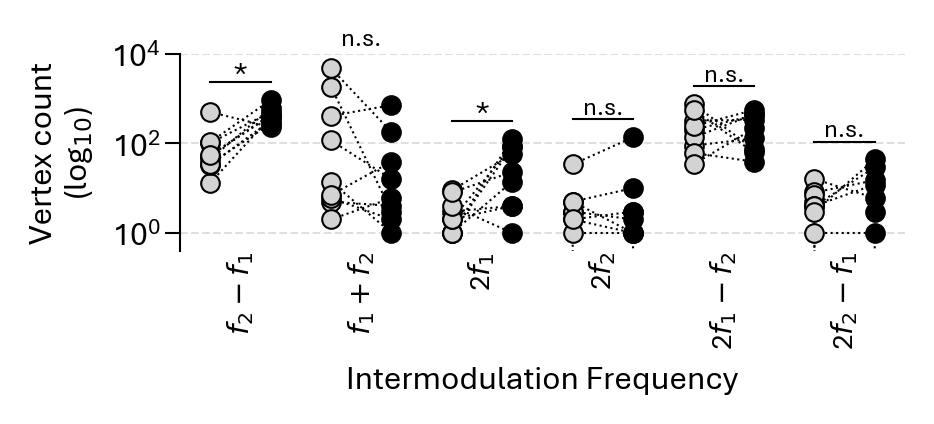

In [12]:

fig, ax = plt.subplots(figsize=(3,1.3),dpi=300, layout="constrained")

im_frequency_texts = get_frequency_text_codes()
im_frequency_xlabels = [im_frequency_texts[im_code] for im_code in im_codes]

pvalues = []
for im_ix, im_code in enumerate(im_codes):
    
    cdf = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.experiment_id=="3TNormal") & (vertex_df.roi_task_id=="control")]
    edf = vertex_df[(vertex_df.corr_type=="uncp") & (vertex_df.fo==0.8) & (vertex_df.im_code==im_code) & (vertex_df.experiment_id=="3TNormal") & (vertex_df.roi_task_id=="entrain")]

    ax.scatter(np.zeros_like(cdf.vertex_count)+im_ix, cdf.vertex_count,c="lightgrey",s=20,edgecolors='k',linewidth=linewidth,zorder=4)
    ax.scatter(np.zeros_like(edf.vertex_count)+(im_ix+.5), edf.vertex_count,c="k",s=20,edgecolor='k',linewidth=linewidth,zorder=4)

    for cvc, evc in zip(cdf.vertex_count, edf.vertex_count):
        ax.plot([im_ix,im_ix+.5],[cvc, evc], linestyle="dotted", color="k", linewidth=linewidth, zorder=2)

    wilcoxon_results = wilcoxon(cdf.vertex_count, edf.vertex_count)
    max_ylim = ax.get_ylim()[-1]
    max_count = max(cdf.vertex_count.max(), edf.vertex_count.max())
    if wilcoxon_results.pvalue < 0.05:
        ax.text(im_ix+.25, max_count*3.5,"*", fontsize=FONTSIZE, ha="center", va='center')
    else:
        ax.text(im_ix+.25, max_count*4.5, "n.s.", fontsize=FONTSIZE-2, ha="center", va='center')
    pvalues.append(wilcoxon_results.pvalue)
    
    ax.plot([im_ix,im_ix+.5],[max_count*2.5]*2, linestyle="-", color="k", linewidth=linewidth, zorder=10)



_ = ax.set_xticks([i+.25 for i in range(len(im_codes))])
_ = ax.set_xticklabels(im_frequency_xlabels, rotation=90, fontsize=FONTSIZE, ha="center")
ax.set_xlim((-.25,5.75))


for spine_type in ("top","right","bottom"):
    ax.spines[spine_type].set_visible(False)
ax.spines.left.set_linewidth(linewidth)


ax.set_yscale("log")
ax.spines.left.set_bounds(.4, 10000)
ax.spines.bottom.set_bounds(0,6)
ax.set_ylim(.4,10000)
ax.set_yticks([1,100,10000])
#ax.set_yticklabels([0,100,1000], fontsize=FONTSIZE)
ax.yaxis.grid(True, which="both",linestyle="--",linewidth=.5,alpha=.4)
ax.minorticks_on()

ax.set_ylabel("Vertex count\n(log$_{10}$)", fontsize=FONTSIZE)
ax.set_xlabel("Intermodulation Frequency", fontsize=FONTSIZE)

ax.tick_params(axis='x', which='both', labelsize=FONTSIZE-1, width=linewidth, pad=0, length=0)
ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=1)


ax.plot([-.25,5.75],[0,0],linestyle="dashed",linewidth=linewidth,zorder=2,c='lightgrey')
fig.savefig(MAIN / f"Fig5_sensitivtity_of_intermodulation_frequencies.png", dpi=300,bbox_inches="tight")


In [12]:
from statsmodels.stats.multitest import multipletests
p_values = np.array(pvalues)
# Apply FDR correction (Benjamini-Hochberg)
reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

print(p_values, pvals_corrected)

[0.01171875 0.42578125 0.01953125 0.62192146 0.734375   0.36213757] [0.05859375 0.63867188 0.05859375 0.734375   0.734375   0.63867188]


In [13]:
im_codes=[i for i in get_roi_colour_codes().keys() if i not in ["f1","f2","f1f2"]]
n_im_codes = len(im_codes)

ROI_FO = 0.8 # Don't change
fo = .8 # Don't change
corr_type = "uncp"

experiment_ids = ["3TNormal"] * 9 * 2 * n_im_codes + ["7TNormal"] * 4 * 1 * n_im_codes + ["3TVary"] * 6 * 1 * n_im_codes + ["7TVary"] * 6 * 1 * n_im_codes
sub_ids = (["000","002","003","004","005","006","007","008","009"] * 2) * n_im_codes \
    + ["Pilot001","Pilot009","Pilot010","Pilot011"] * n_im_codes \
    + ((["020"] * 3 + ["021"] * 3) * n_im_codes) * 2
roi_task_ids = (["control"] * 9 + ["entrain"] * 9) * n_im_codes \
    + (["AttendAway"] * 4) * n_im_codes \
    + (([f"entrain{i}" for i in ["A","B","C","D","E","F"]]) * n_im_codes) * 2
_im_codes = [item for im_code in im_codes for item in [im_code]*18] \
    + [item for im_code in im_codes for item in [im_code]*4] \
    + [item for im_code in im_codes for item in [im_code]*6] \
    + [item for im_code in im_codes for item in [im_code]*6] \


df = pd.read_pickle(PICKLE_DIR / f"im_map_fo-{ROI_FO}_corr-{corr_type}.pkl")

vertex_df = {}
for roi_prefix in ["CONTRA","IPSI"]:
    vertex_dict = defaultdict(list)
    for experiment_id, sub_id, roi_task_id, im_code in zip(experiment_ids, sub_ids, roi_task_ids, _im_codes):
        sub_df = df[(df.sub_id==sub_id) & (df.experiment_id==experiment_id) & (df.roi_task_id==roi_task_id) & (df.im_code==im_code) & (df.roi_fo==ROI_FO) & (df.hcp_roi.str.startswith(roi_prefix))].reset_index()
        # assertions
        for col in ["roi_task_id","roi_fo","sub_id"]:
            assert len(sub_df[col].unique()) == 1, f"{col} > unique element"
        # count
        vertex_count = 0
        for i, row in sub_df.iterrows():
            _vertex_count = (row.train_f_im_activation>=fo).sum()
            vertex_count += _vertex_count

        vertex_dict["corr_type"].append(corr_type)
        vertex_dict["experiment_id"].append(experiment_id)
        vertex_dict["sub_id"].append(sub_id)
        vertex_dict["roi_task_id"].append(roi_task_id)
        vertex_dict["im_code"].append(im_code)
        vertex_dict["vertex_count"].append(vertex_count)
    vertex_df[roi_prefix] = pd.DataFrame(vertex_dict)


Control:True
Raw p: [0.25       0.8203125  0.01576412 0.10474022 0.77943453 0.09128957] [0.375      0.8203125  0.09458469 0.20948043 0.8203125  0.20948043]
0.375
0.820
0.095
0.209
0.820
0.209
Control:False
Raw p: [8.34465027e-07 2.73973249e-01 1.13946383e-03 1.26960472e-01
 8.06879997e-03 1.43512743e-01] [5.00679016e-06 2.73973249e-01 3.41839150e-03 1.72215291e-01
 1.61375999e-02 1.72215291e-01]
0.000
0.274
0.003
0.172
0.016
0.172


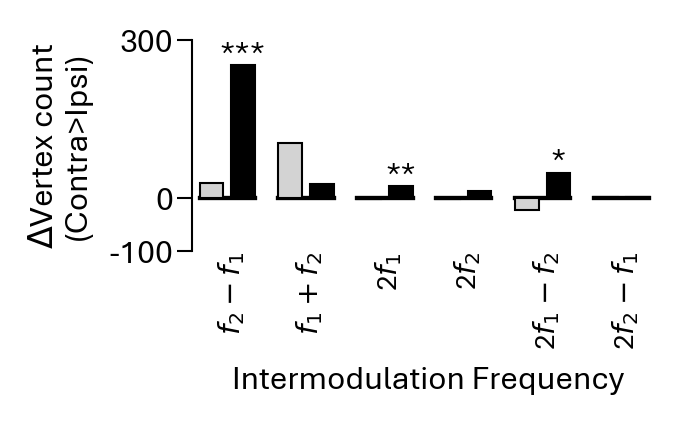

In [14]:

fig, ax = plt.subplots(figsize=(2.2,1.3),dpi=300, layout="constrained")
for compare_control in [True,False]:

    """
    _title="task-control"
    if not compare_control:
        _title="task-entrainment"
    ax.set_title(_title, fontsize=8)
    """

    contra_df = vertex_df["CONTRA"]
    ipsi_df = vertex_df["IPSI"]

    plot_im_codes = ["f2-f1","f1+f2","2f1","2f2","2f1-f2","2f2-f1"]
    im_frequency_xlabels = [im_frequency_texts[i] for i in plot_im_codes]
    pvalues = []
    for im_ix, im_code in enumerate(plot_im_codes):
        if compare_control:
            contra_data = contra_df[(contra_df.roi_task_id=="control") & (contra_df.im_code==im_code)]
            ipsi_data = ipsi_df[(ipsi_df.roi_task_id=="control") & (ipsi_df.im_code==im_code)]
        else:
            ipsi_data = ipsi_df[(ipsi_df.roi_task_id!="control") & (ipsi_df.im_code==im_code)]
            contra_data = contra_df[(contra_df.roi_task_id!="control") & (contra_df.im_code==im_code)]

        assert contra_data.shape == ipsi_data.shape
        
        change_vc_all = []
        for cvc, ivc in zip(contra_data.vertex_count, ipsi_data.vertex_count):
            change_vc = cvc - ivc
            change_vc_all.append(change_vc)
        if compare_control:
            ax.bar(im_ix,np.mean(change_vc_all),width=0.3,zorder=20,color='lightgrey',edgecolor='k',linewidth=linewidth)
        else:
            ax.bar(im_ix+.4,np.mean(change_vc_all),width=0.3,zorder=20,color='k',edgecolor='k',linewidth=linewidth)
        ax.plot([im_ix-.15,im_ix+.4+.15],[0,0],zorder=15,color='k',linewidth=linewidth*2)

        wilcoxon_results = wilcoxon(contra_data.vertex_count, ipsi_data.vertex_count)
        max_ylim = ax.get_ylim()[-1]
        max_count = np.mean(change_vc_all)+20
        if (wilcoxon_results.pvalue*len(plot_im_codes)) < 0.05:
            if compare_control:
                ax.text(im_ix, max_count,"*", fontsize=FONTSIZE, ha="center", va='center')
            else:
                _txt = "*"
                if im_code=="f2-f1":
                    _txt = "***"
                elif im_code =="2f1":
                    _txt = "**"
                ax.text(im_ix+.4, max_count,_txt, fontsize=FONTSIZE, ha="center", va='center')
        pvalues.append(wilcoxon_results.pvalue)
    
    _ = ax.set_xticks([i+.25 for i in range(len(plot_im_codes))])
    _ = ax.set_xticklabels(im_frequency_xlabels, rotation=90, fontsize=FONTSIZE-1, ha="center")
    ax.set_xlim((-.25,len(plot_im_codes)-.25))

    for spine_type in ("top","right","bottom"):
        ax.spines[spine_type].set_visible(False)
    ax.spines.left.set_linewidth(linewidth)


    ax.spines.left.set_bounds(-100,300)
    ax.spines.bottom.set_bounds(0,6)
    ax.set_ylim(-100,300)
    ax.set_yticks([-100,0,300])
    ax.set_yticklabels([-100,0,300], fontsize=FONTSIZE)

    ax.set_ylabel("$\Delta$Vertex count\n(Contra>Ipsi)", fontsize=FONTSIZE)
    ax.set_xlabel("Intermodulation Frequency", fontsize=FONTSIZE)

    ax.tick_params(axis='x', which='both', labelsize=FONTSIZE-1, width=linewidth, pad=0, length=0)
    ax.tick_params(axis='y', which='both', labelsize=FONTSIZE, width=linewidth, pad=1)

    #ax.plot([-.25,len(plot_im_codes)-.25],[0,0],linestyle="dotted",linewidth=linewidth,zorder=2,c='k')
    fig.savefig(MAIN / f"Fig5_sensitivtity_of_laterality.png", dpi=300,bbox_inches="tight")

    p_values = np.array(pvalues)
    # Apply FDR correction (Benjamini-Hochberg)
    reject, pvals_corrected, _, _ = multipletests(p_values, alpha=0.05, method='fdr_bh')

    print(f"Control:{compare_control}")
    print(f"Raw p: {p_values}", pvals_corrected)
    for p in pvals_corrected:
        print(f"{p:.3f}")